# Importing Libraries

In [56]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
import pylab as pylab
%matplotlib inline
os.chdir(r'C:\Users\Saiteja\Desktop\Inter data')

## Reading the file

In [39]:
#from sklearn import model_selection

In [3]:
credit = pd.read_excel("default of credit card clients.xls",names = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default payment next month"] )
credit.head()
os.getcwd()

'C:\\Users\\Saiteja\\Desktop\\Inter data'

In [4]:
#credit.isnull().values.any()
#credit.info()
print(len(credit.index) - credit.count())
print('\n Total:\t\t', credit.isnull().any(1).sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

 Total:		 0


In [5]:
type(credit)

pandas.core.frame.DataFrame

In [6]:
credit.info

<bound method DataFrame.info of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID     LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
6          50000    1          1         2   37      0      0      0      0   
7         500000    1          1         2   29      0      0      0      0   
8         100000    2          2         2   23      0     -1     -1      0   
9         140000    2          3         1   28      0      0      2      0   
10         20000    1          3         2   35     -2     -2     -2     -2   
11        200000    

In [70]:
credit1 = pd.read_csv('credit1.csv',index_col=0)

In [71]:
#new_credit.drop(new_credit.columns[[0]], axis=1)
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [72]:
credit1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [73]:
credit1.SEX = credit1['SEX'].astype('category')
credit1.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [74]:
credit1.EDUCATION = credit1['EDUCATION'].astype('category')
credit1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [75]:
credit1.MARRIAGE = credit1['MARRIAGE'].astype('category')
credit1.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [6]:
credit1.defaultpaymentnextmonth = credit1['default payment next month'].astype('category')
credit1.defaultpaymentnextmonth.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [76]:
credit1.MARRIAGE = credit1.MARRIAGE 

In [77]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
# Iterating over all the common columns in data
for col in credit1.columns.values:
       # Encoding only categorical variables
       if credit1[col].dtypes == 'object':
              credit1_cat = credit1[col].append(credit1[col])
              le.fit(credit1_cat.values)
              credit2[col]=le.transform(credit1[col])
      

In [79]:
credit1.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
dtype: object

In [80]:
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


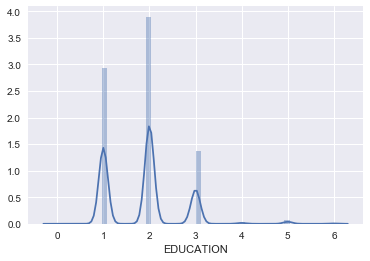

In [82]:
graph_feature = 'EDUCATION'
#Distribution Plot
edu = sns.distplot(
    credit1[graph_feature]
)
#pylab.savefig('edu.png')

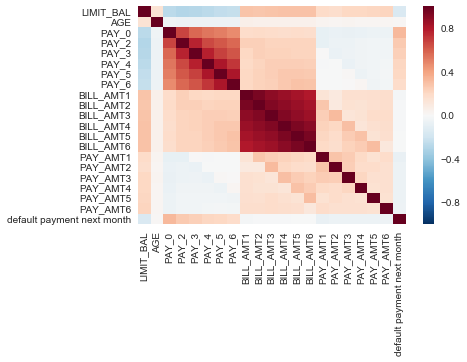

In [83]:
sns.heatmap(credit1.corr(),vmax=1)
pylab.savefig('Heatmap.png')

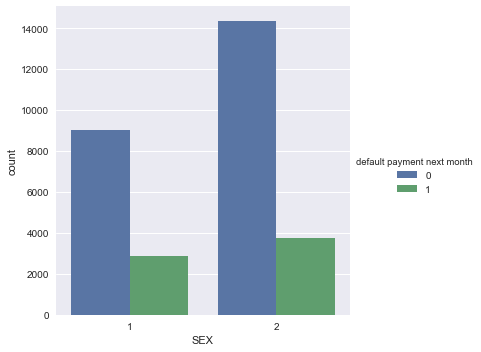

In [84]:
sns.factorplot(data = credit1,x = dependent_var ,hue = 'default payment next month' ,kind = 'count',size = 5)
pylab.savefig('Sexandy.png',bbox_inches = 'tight')

## Creating additional features

In [90]:
credit1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AMT_OWED', 'AVG_6MTH_BAL',
       'MISSED_PAYMENTS', 'BALANCE_TO_LIMIT_RATIO'],
      dtype='object')

In [89]:
#Running or cumulative sum of bill amount - payment amount for each individual
credit1['AMT_OWED'] = (credit1.BILL_AMT1-credit1.PAY_AMT1)+(credit1.BILL_AMT2-credit1.PAY_AMT2)+(credit1.BILL_AMT3-credit1.PAY_AMT3)+(credit1.BILL_AMT4-credit1.PAY_AMT4)+(credit1.BILL_AMT5-credit1.PAY_AMT5)+(credit1.BILL_AMT6-credit1.PAY_AMT6)
#Mean value of AMT_OWED over a 6 month period
credit1['AVG_6MTH_BAL'] = credit1.AMT_OWED/6
#Maxium number of missed payments recorded for the individual
credit1['MISSED_PAYMENTS'] = credit1.PAY_0 + credit1.PAY_2 + credit1.PAY_3 + credit1.PAY_4 + credit1.PAY_5 + credit1.PAY_6
#Average 6 month balance divided by the individual’s credit limit; note anything <= .3 is considered good
credit1['BALANCE_TO_LIMIT_RATIO'] = credit1.AVG_6MTH_BAL/credit1.LIMIT_BAL
#Groups individuals into 10 year age grouping [20-29] through [70-79]
#credit1.AGE_RANGE =

In [91]:
credit1.to_csv(r'C:\Users\Saiteja\Desktop\Inter data\Final_credit',sep= ',',index= False)

In [ ]:
#from sklearn.model_selection import train_test_split

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(credit1, y, test_size=0.2)
#print (X_train.shape, y_train.shape)
#print (X_test.shape, y_test.shape)

(24000, 24) (24000,)
(6000, 24) (6000,)


# Modelling

In [42]:
#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression()
#model.fit(X_train,y_train)

In [43]:
#print(model.score(X_train,y_train))

In [ ]:
#model.fit(X_train,y_train)

In [41]:
#print(model.score(X_train,y_test))

In [25]:
#from sklearn.naive_bayes import GaussianNB #Naive bayes

In [44]:
#model=GaussianNB()
#model.fit(X_train,y_train)
#print(model.score(X_train,y_train)) ## LOOKS LIKE NAIVE BAYES IS GIVING BAD SCORE

In [45]:
#from sklearn.tree import DecisionTreeClassifier #Decision Tree
#model=DecisionTreeClassifier()
#model.fit(X_train,y_train)
#print(model.score(X_train,y_train)) ## Looks like the model has ovefitted

In [46]:
#from sklearn.ensemble import RandomForestClassifier #Random Forest
#model=RandomForestClassifier(n_estimators=100)
#model.fit(X_train,y_train)

In [47]:
#print(model.score(X_train,y_train)) ## Looks like even random forest is overfitting 